# Project: Investigate a Dataset (How has been world trend changed over 200 years in terms of population, life expectancy, fertility,income per person in each country)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This report shows how the world has been changed in tha last 200 years with respect to population, income, life expectancy,woman fertility in each country.

I use 4 datasets which are obtained from Gapminder World https://www.gapminder.org/data/.
Here are their names shown below.

1. "children_per_woman_total_fertility.csv" -> Total fertility of each woman according to each country.
2. "income_per_person_gdppercapita_ppp_inflation_adjusted.csv" -> Income per each individual according to each country
3. "life_expectancy_years.csv" -> the longavity of total life according to each country
4. "population_total.csv" -> Total popuuation according to each country

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
# Importing neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

# Loading the data 
total_fertility_df = pd.read_csv('children_per_woman_total_fertility.csv',encoding = "utf-8")
income_gdppercapita_df = pd.read_csv('income_per_person_gdppercapita_ppp_inflation_adjusted.csv',encoding = "utf-8")
life_expectancy_df = pd.read_csv('life_expectancy_years.csv',encoding = "utf-8")
population_df = pd.read_csv('population_total.csv',encoding = "utf-8")

In [3]:
# print each dataset and inspect each dataset
total_fertility_df.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,...,6.04,5.82,5.60,5.38,5.17,4.98,4.80,4.64,4.48,4.33
1,Albania,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,...,1.65,1.65,1.67,1.69,1.70,1.71,1.71,1.71,1.71,1.71
2,Algeria,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,...,2.83,2.89,2.93,2.94,2.92,2.89,2.84,2.78,2.71,2.64
3,Angola,6.93,6.93,6.93,6.93,6.93,6.93,6.93,6.94,6.94,...,6.24,6.16,6.08,6.00,5.92,5.84,5.77,5.69,5.62,5.55
4,Antigua and Barbuda,5.00,5.00,4.99,4.99,4.99,4.98,4.98,4.97,4.97,...,2.15,2.13,2.12,2.10,2.09,2.08,2.06,2.05,2.04,2.03


In [4]:
total_fertility_df.tail()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
179,Venezuela,5.63,5.63,5.64,5.64,5.64,5.65,5.65,5.65,5.66,...,2.50,2.47,2.44,2.42,2.39,2.37,2.34,2.32,2.29,2.27
180,Vietnam,4.70,4.70,4.70,4.70,4.70,4.70,4.70,4.70,4.70,...,1.94,1.95,1.95,1.96,1.96,1.96,1.96,1.95,1.95,1.95
181,Yemen,6.88,6.88,6.88,6.88,6.88,6.88,6.88,6.88,6.88,...,4.80,4.67,4.55,4.44,4.33,4.22,4.10,4.00,3.89,3.79
182,Zambia,6.71,6.71,6.71,6.71,6.71,6.71,6.71,6.71,6.71,...,5.48,5.40,5.32,5.24,5.17,5.10,5.04,4.98,4.93,4.87
183,Zimbabwe,6.75,6.75,6.75,6.75,6.75,6.75,6.75,6.75,6.75,...,4.02,4.03,4.02,4.00,3.96,3.90,3.84,3.76,3.68,3.61


In [5]:
total_fertility_df.describe()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
count,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,...,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000
mean,6.110707,6.107663,6.111033,6.110054,6.110435,6.110217,6.105815,6.104511,6.096359,6.084457,...,3.022717,2.994783,2.962283,2.932337,2.902717,2.869457,2.835924,2.801957,2.769348,2.737609
std,0.791456,0.795118,0.789068,0.788346,0.788456,0.784976,0.790403,0.791440,0.806280,0.834796,...,1.546635,1.516852,1.489848,1.459351,1.428993,1.400419,1.372184,1.343670,1.314814,1.286030
min,4.040000,4.040000,3.910000,4.050000,3.940000,4.060000,4.070000,4.050000,4.000000,3.210000,...,1.180000,1.190000,1.210000,1.220000,1.240000,1.250000,1.240000,1.240000,1.230000,1.230000
25%,5.670000,5.670000,5.670000,5.670000,5.670000,5.670000,5.670000,5.670000,5.670000,5.670000,...,1.817500,1.810000,1.797500,1.797500,1.790000,1.787500,1.777500,1.750000,1.757500,1.750000
50%,6.190000,6.190000,6.190000,6.190000,6.190000,6.190000,6.190000,6.180000,6.160000,6.160000,...,2.495000,2.475000,2.455000,2.410000,2.380000,2.360000,2.335000,2.315000,2.285000,2.265000
75%,6.717500,6.717500,6.717500,6.717500,6.717500,6.717500,6.717500,6.717500,6.717500,6.717500,...,4.057500,4.042500,4.027500,4.002500,3.960000,3.902500,3.842500,3.767500,3.690000,3.622500
max,8.100000,8.100000,8.100000,8.100000,8.100000,8.100000,8.100000,8.100000,8.100000,8.100000,...,7.520000,7.490000,7.460000,7.420000,7.380000,7.340000,7.290000,7.240000,7.180000,7.130000


In [6]:
total_fertility_df_count_row = total_fertility_df.shape[0]  # gives number of row count
total_fertility_df_count_col = total_fertility_df.shape[1]  # gives number of col count
print("Total Fertility Dataset : {} rows and {} columns "
      .format(total_fertility_df_count_row,total_fertility_df_count_col))

Total Fertility Dataset : 184 rows and 220 columns 


In [7]:
income_gdppercapita_df.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
0,Afghanistan,603,603,603,603,603,603,603,603,603,...,2420,2470,2520,2580,2640,2700,2760,2820,2880,2940
1,Albania,667,667,667,667,667,668,668,668,668,...,18500,18900,19300,19700,20200,20600,21100,21500,22000,22500
2,Algeria,715,716,717,718,719,720,721,722,723,...,15600,15900,16300,16700,17000,17400,17800,18200,18600,19000
3,Andorra,1200,1200,1200,1200,1210,1210,1210,1210,1220,...,73200,74800,76400,78100,79900,81600,83400,85300,87200,89100
4,Angola,618,620,623,626,628,631,634,637,640,...,6270,6410,6550,6700,6850,7000,7150,7310,7470,7640


In [8]:
income_gdppercapita_df.tail()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
188,Venezuela,682,682,682,682,682,682,682,682,682,...,14400,14700,15100,15400,15700,16100,16400,16800,17200,17600
189,Vietnam,861,861,861,861,861,861,861,861,862,...,10100,10300,10600,10800,11000,11300,11500,11800,12100,12300
190,Yemen,877,879,882,884,887,889,892,894,897,...,3250,3320,3390,3470,3550,3620,3700,3790,3870,3960
191,Zambia,663,665,667,668,670,671,673,675,676,...,5410,5530,5650,5780,5910,6040,6170,6310,6450,6590
192,Zimbabwe,869,870,871,872,873,874,875,876,877,...,2630,2690,2750,2810,2880,2940,3000,3070,3140,3210


In [9]:
income_gdppercapita_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Columns: 242 entries, country to 2040
dtypes: int64(241), object(1)
memory usage: 365.0+ KB


In [10]:
income_gdppercapita_df.describe()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,...,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.00000,193.000000,193.000000,193.000000
mean,947.782383,948.269430,951.217617,950.911917,952.772021,953.202073,954.305699,953.979275,950.911917,952.202073,...,23851.284974,24367.823834,24912.518135,25465.181347,26028.062176,26607.435233,27199.07772,27804.968912,28415.119171,29039.730570
std,508.348372,506.753967,516.692581,511.552526,518.974690,513.492023,514.667191,508.132446,490.318368,492.600302,...,24946.900512,25460.500225,26036.659984,26630.953200,27203.647785,27809.921089,28446.04490,29092.365685,29694.419993,30348.528109
min,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,...,718.000000,734.000000,750.000000,767.000000,784.000000,801.000000,819.00000,837.000000,856.000000,875.000000
25%,608.000000,608.000000,608.000000,609.000000,609.000000,609.000000,610.000000,610.000000,610.000000,611.000000,...,4840.000000,4950.000000,5060.000000,5170.000000,5290.000000,5400.000000,5520.00000,5650.000000,5770.000000,5900.000000
50%,847.000000,847.000000,847.000000,847.000000,848.000000,848.000000,849.000000,850.000000,850.000000,851.000000,...,15600.000000,15900.000000,16300.000000,16700.000000,17000.000000,17400.000000,17800.00000,18200.000000,18600.000000,19000.000000
75%,1100.000000,1100.000000,1110.000000,1110.000000,1110.000000,1120.000000,1120.000000,1130.000000,1130.000000,1140.000000,...,35900.000000,36700.000000,37500.000000,38400.000000,39200.000000,40100.000000,41000.00000,41900.000000,42800.000000,43800.000000
max,4230.000000,4160.000000,4390.000000,4300.000000,4500.000000,4240.000000,4270.000000,3910.000000,3480.000000,3430.000000,...,150000.000000,153000.000000,156000.000000,160000.000000,163000.000000,167000.000000,171000.00000,175000.000000,178000.000000,182000.000000


In [11]:
income_gdppercapita_df_count_row = income_gdppercapita_df.shape[0]  # gives number of row count
income_gdppercapita_df_count_col = income_gdppercapita_df.shape[1]  # gives number of col count
print("Income GDP per capita Dataset : {} rows and {} columns "
      .format(income_gdppercapita_df_count_row,income_gdppercapita_df_count_col))

Income GDP per capita Dataset : 193 rows and 242 columns 


In [12]:
life_expectancy_df.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,...,55.7,56.2,56.7,57.2,57.7,57.8,57.9,58.0,58.4,58.7
1,Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,75.9,76.3,76.7,77.0,77.2,77.4,77.6,77.7,77.9,78.0
2,Algeria,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,...,76.3,76.5,76.7,76.8,77.0,77.1,77.3,77.4,77.6,77.9
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,82.7,82.7,82.6,82.6,82.6,82.6,82.5,82.5,NaN,NaN
4,Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,59.3,60.1,60.9,61.7,62.5,63.3,64.0,64.7,64.9,65.2


In [13]:
life_expectancy_df.tail()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
182,Venezuela,32.2,32.2,32.2,32.2,32.2,32.2,32.2,32.2,32.2,...,75.0,75.4,75.4,75.3,75.4,75.5,75.5,75.5,75.7,75.9
183,Vietnam,32.0,32.0,32.0,32.0,32.0,32.0,32.0,32.0,32.0,...,72.8,73.1,73.3,73.6,73.8,74.1,74.3,74.5,74.7,74.9
184,Yemen,23.4,23.4,23.4,23.4,23.4,23.4,23.4,23.4,23.4,...,67.0,67.5,67.7,67.9,68.4,68.4,67.2,66.7,66.9,67.1
185,Zambia,32.6,32.6,32.6,32.6,32.6,32.6,32.6,32.6,32.6,...,50.7,52.0,53.2,54.5,55.7,57.0,58.1,58.8,59.1,59.5
186,Zimbabwe,33.7,33.7,33.7,33.7,33.7,33.7,33.7,33.7,33.7,...,47.5,49.6,51.9,54.1,55.6,57.0,58.3,59.3,59.8,60.2


In [14]:
life_expectancy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Columns: 220 entries, country to 2018
dtypes: float64(219), object(1)
memory usage: 321.5+ KB


In [15]:
life_expectancy_df.describe()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
count,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,...,187.000000,187.000000,187.000000,187.00000,187.000000,187.000000,187.000000,187.000000,184.000000,184.000000
mean,31.502717,31.461957,31.478804,31.383152,31.459239,31.586413,31.644565,31.598370,31.383152,31.310326,...,70.001070,70.225668,70.659358,71.05615,71.399465,71.622995,71.933690,72.206952,72.422283,72.658152
std,3.814689,3.806303,3.938674,3.962376,3.934674,4.010884,4.110598,3.981247,4.087872,4.040580,...,8.832102,9.050710,8.439841,8.18101,7.996165,7.889169,7.605557,7.414169,7.331040,7.252807
min,23.400000,23.400000,23.400000,19.600000,23.400000,23.400000,23.400000,23.400000,12.500000,13.400000,...,45.400000,32.100000,47.500000,47.90000,48.000000,48.400000,49.600000,50.300000,50.800000,51.100000
25%,29.075000,28.975000,28.900000,28.900000,28.975000,29.075000,29.075000,29.075000,28.975000,28.875000,...,63.400000,63.900000,64.300000,65.00000,65.350000,65.550000,66.050000,66.650000,66.900000,67.100000
50%,31.750000,31.650000,31.550000,31.500000,31.550000,31.650000,31.750000,31.750000,31.550000,31.500000,...,72.500000,72.600000,72.700000,72.80000,72.900000,73.000000,73.300000,73.500000,73.700000,74.050000
75%,33.825000,33.900000,33.825000,33.625000,33.725000,33.825000,33.925000,33.925000,33.725000,33.625000,...,76.600000,76.700000,76.900000,77.00000,77.200000,77.350000,77.500000,77.650000,77.825000,78.025000
max,42.900000,40.300000,44.400000,44.800000,42.800000,44.300000,45.800000,43.600000,43.500000,41.700000,...,82.700000,82.800000,82.900000,83.20000,83.400000,83.600000,83.800000,83.900000,84.000000,84.200000


In [16]:
life_expectancy_df_count_row = life_expectancy_df.shape[0]  # gives number of row count
life_expectancy_df_count_col = life_expectancy_df.shape[1]  # gives number of col count
print("Life Expectancy Dataset : {} rows and {} columns "
      .format(life_expectancy_df_count_row,life_expectancy_df_count_col))

Life Expectancy Dataset : 187 rows and 220 columns 


In [17]:
population_df.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,3280000,3280000,3280000,3280000,3280000,3280000,3280000,3280000,3280000,...,71900000,71800000,71600000,71500000,71300000,71200000,71000000,70800000,70600000,70400000
1,Albania,410000,412000,413000,414000,416000,417000,418000,420000,421000,...,1820000,1800000,1780000,1760000,1740000,1720000,1710000,1690000,1670000,1660000
2,Algeria,2500000,2510000,2520000,2530000,2540000,2550000,2560000,2570000,2580000,...,62800000,62800000,62800000,62800000,62800000,62800000,62700000,62700000,62600000,62600000
3,Andorra,2650,2650,2650,2650,2650,2650,2650,2650,2650,...,64300,64200,64100,63900,63800,63700,63500,63400,63300,63100
4,Angola,1570000,1570000,1570000,1570000,1570000,1570000,1570000,1570000,1570000,...,156000000,158000000,160000000,162000000,164000000,166000000,167000000,169000000,171000000,173000000


In [18]:
population_df.tail()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
190,Venezuela,718000,718000,718000,718000,718000,718000,718000,718000,718000,...,42500000,42500000,42400000,42300000,42200000,42100000,42000000,41900000,41800000,41600000
191,Vietnam,6550000,6550000,6550000,6550000,6550000,6550000,6550000,6550000,6550000,...,110000000,109000000,109000000,109000000,109000000,109000000,108000000,108000000,108000000,108000000
192,Yemen,2590000,2590000,2590000,2590000,2590000,2590000,2590000,2590000,2590000,...,54700000,54600000,54500000,54400000,54200000,54100000,54000000,53800000,53700000,53500000
193,Zambia,747000,747000,747000,747000,747000,747000,747000,747000,747000,...,84600000,85700000,86800000,87900000,89000000,90100000,91200000,92300000,93300000,94400000
194,Zimbabwe,1090000,1090000,1090000,1090000,1090000,1090000,1090000,1090000,1090000,...,40000000,40100000,40200000,40300000,40400000,40500000,40500000,40600000,40600000,40700000


In [19]:
population_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Columns: 302 entries, country to 2100
dtypes: int64(301), object(1)
memory usage: 460.2+ KB


In [20]:
population_df.describe()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
count,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,...,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02
mean,4.858439e+06,4.875184e+06,4.896420e+06,4.921854e+06,4.944249e+06,4.965603e+06,4.987121e+06,5.008500e+06,5.029397e+06,5.056351e+06,...,5.659498e+07,5.662540e+07,5.675702e+07,5.679806e+07,5.692194e+07,5.694654e+07,5.700201e+07,5.707281e+07,5.713275e+07,5.719615e+07
std,2.623298e+07,2.635925e+07,2.654860e+07,2.676926e+07,2.695929e+07,2.714956e+07,2.730824e+07,2.749855e+07,2.768943e+07,2.791149e+07,...,1.564600e+08,1.558650e+08,1.561099e+08,1.555318e+08,1.557702e+08,1.551804e+08,1.549070e+08,1.548159e+08,1.545554e+08,1.544635e+08
min,9.050000e+02,9.050000e+02,9.050000e+02,9.050000e+02,9.050000e+02,9.050000e+02,9.050000e+02,9.050000e+02,9.050000e+02,9.050000e+02,...,8.060000e+02,8.050000e+02,8.060000e+02,8.020000e+02,8.030000e+02,8.040000e+02,8.020000e+02,7.990000e+02,8.000000e+02,7.980000e+02
25%,1.120000e+05,1.120000e+05,1.120000e+05,1.120000e+05,1.120000e+05,1.120000e+05,1.120000e+05,1.120000e+05,1.120000e+05,1.120000e+05,...,2.035000e+06,2.025000e+06,2.010000e+06,1.995000e+06,1.985000e+06,1.975000e+06,1.960000e+06,1.950000e+06,1.940000e+06,1.925000e+06
50%,7.130000e+05,7.130000e+05,7.130000e+05,7.130000e+05,7.130000e+05,7.130000e+05,7.130000e+05,7.130000e+05,7.130000e+05,7.170000e+05,...,1.260000e+07,1.260000e+07,1.250000e+07,1.240000e+07,1.240000e+07,1.230000e+07,1.230000e+07,1.220000e+07,1.210000e+07,1.210000e+07
75%,2.120000e+06,2.120000e+06,2.120000e+06,2.120000e+06,2.120000e+06,2.120000e+06,2.120000e+06,2.120000e+06,2.120000e+06,2.120000e+06,...,4.915000e+07,4.915000e+07,4.900000e+07,4.880000e+07,4.860000e+07,4.840000e+07,4.825000e+07,4.805000e+07,4.795000e+07,4.805000e+07
max,3.220000e+08,3.240000e+08,3.270000e+08,3.300000e+08,3.330000e+08,3.360000e+08,3.380000e+08,3.410000e+08,3.440000e+08,3.470000e+08,...,1.570000e+09,1.560000e+09,1.560000e+09,1.550000e+09,1.550000e+09,1.540000e+09,1.530000e+09,1.530000e+09,1.520000e+09,1.520000e+09


In [21]:
population_df_count_row = population_df.shape[0]  # gives number of row count
population_df_count_col = population_df.shape[1]  # gives number of col count
print("Population Dataset : {} rows and {} columns "
      .format(population_df_count_row,population_df_count_col))

Population Dataset : 195 rows and 302 columns 


In [22]:
# print each data type of each data frame
print("Total Fertility Column Data Type")
print(total_fertility_df.dtypes)

Total Fertility Column Data Type
country     object
1800       float64
1801       float64
1802       float64
1803       float64
1804       float64
1805       float64
1806       float64
1807       float64
1808       float64
1809       float64
1810       float64
1811       float64
1812       float64
1813       float64
1814       float64
1815       float64
1816       float64
1817       float64
1818       float64
1819       float64
1820       float64
1821       float64
1822       float64
1823       float64
1824       float64
1825       float64
1826       float64
1827       float64
1828       float64
            ...   
1989       float64
1990       float64
1991       float64
1992       float64
1993       float64
1994       float64
1995       float64
1996       float64
1997       float64
1998       float64
1999       float64
2000       float64
2001       float64
2002       float64
2003       float64
2004       float64
2005       float64
2006       float64
2007       float64
2008       float6

In [23]:
print("Income GDP per capita Column Data Type")
print(income_gdppercapita_df.dtypes)

Income GDP per capita Column Data Type
country    object
1800        int64
1801        int64
1802        int64
1803        int64
1804        int64
1805        int64
1806        int64
1807        int64
1808        int64
1809        int64
1810        int64
1811        int64
1812        int64
1813        int64
1814        int64
1815        int64
1816        int64
1817        int64
1818        int64
1819        int64
1820        int64
1821        int64
1822        int64
1823        int64
1824        int64
1825        int64
1826        int64
1827        int64
1828        int64
            ...  
2011        int64
2012        int64
2013        int64
2014        int64
2015        int64
2016        int64
2017        int64
2018        int64
2019        int64
2020        int64
2021        int64
2022        int64
2023        int64
2024        int64
2025        int64
2026        int64
2027        int64
2028        int64
2029        int64
2030        int64
2031        int64
2032        int64
2033   

In [24]:
print("Life Expectancy Column Data Type")
print(life_expectancy_df.dtypes)

Life Expectancy Column Data Type
country     object
1800       float64
1801       float64
1802       float64
1803       float64
1804       float64
1805       float64
1806       float64
1807       float64
1808       float64
1809       float64
1810       float64
1811       float64
1812       float64
1813       float64
1814       float64
1815       float64
1816       float64
1817       float64
1818       float64
1819       float64
1820       float64
1821       float64
1822       float64
1823       float64
1824       float64
1825       float64
1826       float64
1827       float64
1828       float64
            ...   
1989       float64
1990       float64
1991       float64
1992       float64
1993       float64
1994       float64
1995       float64
1996       float64
1997       float64
1998       float64
1999       float64
2000       float64
2001       float64
2002       float64
2003       float64
2004       float64
2005       float64
2006       float64
2007       float64
2008       float6

In [25]:
print("Population Column Data Type")
print(population_df.dtypes)

Population Column Data Type
country    object
1800        int64
1801        int64
1802        int64
1803        int64
1804        int64
1805        int64
1806        int64
1807        int64
1808        int64
1809        int64
1810        int64
1811        int64
1812        int64
1813        int64
1814        int64
1815        int64
1816        int64
1817        int64
1818        int64
1819        int64
1820        int64
1821        int64
1822        int64
1823        int64
1824        int64
1825        int64
1826        int64
1827        int64
1828        int64
            ...  
2071        int64
2072        int64
2073        int64
2074        int64
2075        int64
2076        int64
2077        int64
2078        int64
2079        int64
2080        int64
2081        int64
2082        int64
2083        int64
2084        int64
2085        int64
2086        int64
2087        int64
2088        int64
2089        int64
2090        int64
2091        int64
2092        int64
2093        int64




### Data Cleaning , Data Melting ,Data Merging

In [26]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
pd.isna(total_fertility_df).sum().sum()

0

In [27]:
total_fertility_df = total_fertility_df.dropna(axis=0)

In [28]:
pd.isna(total_fertility_df).sum().sum()

0

In [29]:
total_fertility_df.head(2)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,...,6.04,5.82,5.60,5.38,5.17,4.98,4.80,4.64,4.48,4.33
1,Albania,4.6,4.6,4.6,4.6,4.6,4.6,4.6,4.6,4.6,...,1.65,1.65,1.67,1.69,1.70,1.71,1.71,1.71,1.71,1.71


In [30]:
pd.isna(income_gdppercapita_df).sum().sum()

0

In [31]:
income_gdppercapita_df = income_gdppercapita_df.dropna(axis=0)

In [32]:
pd.isna(income_gdppercapita_df).sum().sum()

0

In [33]:
income_gdppercapita_df.head(2)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
0,Afghanistan,603,603,603,603,603,603,603,603,603,...,2420,2470,2520,2580,2640,2700,2760,2820,2880,2940
1,Albania,667,667,667,667,667,668,668,668,668,...,18500,18900,19300,19700,20200,20600,21100,21500,22000,22500


In [34]:
pd.isna(life_expectancy_df).sum().sum()

516

In [35]:
life_expectancy_df = life_expectancy_df.dropna(axis=0)

In [36]:
pd.isna(life_expectancy_df).sum().sum()

0

In [37]:
life_expectancy_df.head(2)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,...,55.7,56.2,56.7,57.2,57.7,57.8,57.9,58.0,58.4,58.7
1,Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,75.9,76.3,76.7,77.0,77.2,77.4,77.6,77.7,77.9,78.0


In [38]:
pd.isna(population_df).sum().sum()

0

In [39]:
population_df = population_df.dropna(axis=0)

In [40]:
population_df.head(2)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,3280000,3280000,3280000,3280000,3280000,3280000,3280000,3280000,3280000,...,71900000,71800000,71600000,71500000,71300000,71200000,71000000,70800000,70600000,70400000
1,Albania,410000,412000,413000,414000,416000,417000,418000,420000,421000,...,1820000,1800000,1780000,1760000,1740000,1720000,1710000,1690000,1670000,1660000


In [41]:
# https://stackoverflow.com/questions/36667548/how-to-create-a-series-of-numbers-using-pandas-in-python
total_fertility_df_melt = pd.melt(total_fertility_df,
        id_vars=['country'],
        value_vars = pd.Series(range(1800,2019)).astype(str),
        var_name='Year',
        value_name='Total_Fertility')
total_fertility_df_melt

,country,Year,Total_Fertility
0,Afghanistan,1800,7.00
1,Albania,1800,4.60
2,Algeria,1800,6.99
3,Angola,1800,6.93
4,Antigua and Barbuda,1800,5.00
5,Argentina,1800,6.80
6,Armenia,1800,7.80
7,Australia,1800,6.50
8,Austria,1800,5.10
9,Azerbaijan,1800,8.10


In [42]:
income_gdppercapita_df_melt = pd.melt(income_gdppercapita_df,
        id_vars=['country'],
        value_vars = pd.Series(range(1800,2019)).astype(str),
        var_name='Year',
        value_name='Income_GDP_Per_Capita')
income_gdppercapita_df_melt

,country,Year,Income_GDP_Per_Capita
0,Afghanistan,1800,603
1,Albania,1800,667
2,Algeria,1800,715
3,Andorra,1800,1200
4,Angola,1800,618
5,Antigua and Barbuda,1800,757
6,Argentina,1800,1510
7,Armenia,1800,514
8,Australia,1800,814
9,Austria,1800,1850


In [43]:
life_expectancy_df_melt = pd.melt(life_expectancy_df,
        id_vars=['country'],
        value_vars = pd.Series(range(1800,2019)).astype(str),
        var_name='Year',
        value_name='Life_Expectancy')
life_expectancy_df_melt

,country,Year,Life_Expectancy
0,Afghanistan,1800,28.2
1,Albania,1800,35.4
2,Algeria,1800,28.8
3,Angola,1800,27.0
4,Antigua and Barbuda,1800,33.5
5,Argentina,1800,33.2
6,Armenia,1800,34.0
7,Australia,1800,34.0
8,Austria,1800,34.4
9,Azerbaijan,1800,29.2


In [44]:
population_df_melt = pd.melt(population_df,
        id_vars=['country'],
        value_vars = pd.Series(range(1800,2019)).astype(str),
        var_name='Year',
        value_name='Population')
population_df_melt

,country,Year,Population
0,Afghanistan,1800,3280000
1,Albania,1800,410000
2,Algeria,1800,2500000
3,Andorra,1800,2650
4,Angola,1800,1570000
5,Antigua and Barbuda,1800,37000
6,Argentina,1800,534000
7,Armenia,1800,413000
8,Australia,1800,351000
9,Austria,1800,3210000


In [45]:
total_fertility_df_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40296 entries, 0 to 40295
Data columns (total 3 columns):
country            40296 non-null object
Year               40296 non-null object
Total_Fertility    40296 non-null float64
dtypes: float64(1), object(2)
memory usage: 944.5+ KB


In [46]:
total_fertility_df_melt.describe()

,Total_Fertility
count,40296.000000
mean,5.400408
std,1.635006
min,1.120000
25%,4.590000
50%,5.940000
75%,6.610000
max,8.870000


In [47]:
income_gdppercapita_df_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42267 entries, 0 to 42266
Data columns (total 3 columns):
country                  42267 non-null object
Year                     42267 non-null object
Income_GDP_Per_Capita    42267 non-null int64
dtypes: int64(1), object(2)
memory usage: 990.7+ KB


In [48]:
income_gdppercapita_df_melt.describe()

,Income_GDP_Per_Capita
count,42267.000000
mean,4690.943100
std,10261.253737
min,247.000000
25%,877.000000
50%,1450.000000
75%,3520.000000
max,178000.000000


In [49]:
life_expectancy_df_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40296 entries, 0 to 40295
Data columns (total 3 columns):
country            40296 non-null object
Year               40296 non-null object
Life_Expectancy    40296 non-null float64
dtypes: float64(1), object(2)
memory usage: 944.5+ KB


In [50]:
life_expectancy_df_melt.describe()

,Life_Expectancy
count,40296.000000
mean,43.031052
std,16.246992
min,1.000000
25%,31.100000
50%,35.500000
75%,55.600000
max,84.200000


In [51]:
population_df_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42705 entries, 0 to 42704
Data columns (total 3 columns):
country       42705 non-null object
Year          42705 non-null object
Population    42705 non-null int64
dtypes: int64(1), object(2)
memory usage: 1001.0+ KB


In [52]:
population_df_melt.describe()

,Population
count,4.270500e+04
mean,1.298432e+07
std,6.435156e+07
min,6.420000e+02
25%,2.830000e+05
50%,1.710000e+06
75%,5.940000e+06
max,1.420000e+09


In [53]:
trend_df = pd.merge(total_fertility_df_melt, 
                    income_gdppercapita_df_melt,  
                    how='left', 
                    left_on=['country','Year'], 
                    right_on = ['country','Year'])
trend_df

,country,Year,Total_Fertility,Income_GDP_Per_Capita
0,Afghanistan,1800,7.00,603
1,Albania,1800,4.60,667
2,Algeria,1800,6.99,715
3,Angola,1800,6.93,618
4,Antigua and Barbuda,1800,5.00,757
5,Argentina,1800,6.80,1510
6,Armenia,1800,7.80,514
7,Australia,1800,6.50,814
8,Austria,1800,5.10,1850
9,Azerbaijan,1800,8.10,775


In [54]:
trend_df = pd.merge(trend_df, 
                    life_expectancy_df_melt,  
                    how='left', 
                    left_on=['country','Year'], 
                    right_on = ['country','Year'])
trend_df

,country,Year,Total_Fertility,Income_GDP_Per_Capita,Life_Expectancy
0,Afghanistan,1800,7.00,603,28.2
1,Albania,1800,4.60,667,35.4
2,Algeria,1800,6.99,715,28.8
3,Angola,1800,6.93,618,27.0
4,Antigua and Barbuda,1800,5.00,757,33.5
5,Argentina,1800,6.80,1510,33.2
6,Armenia,1800,7.80,514,34.0
7,Australia,1800,6.50,814,34.0
8,Austria,1800,5.10,1850,34.4
9,Azerbaijan,1800,8.10,775,29.2


In [55]:
trend_df = pd.merge(trend_df, 
                    population_df_melt,  
                    how='left', 
                    left_on=['country','Year'], 
                    right_on = ['country','Year'])
trend_df

,country,Year,Total_Fertility,Income_GDP_Per_Capita,Life_Expectancy,Population
0,Afghanistan,1800,7.00,603,28.2,3280000
1,Albania,1800,4.60,667,35.4,410000
2,Algeria,1800,6.99,715,28.8,2500000
3,Angola,1800,6.93,618,27.0,1570000
4,Antigua and Barbuda,1800,5.00,757,33.5,37000
5,Argentina,1800,6.80,1510,33.2,534000
6,Armenia,1800,7.80,514,34.0,413000
7,Australia,1800,6.50,814,34.0,351000
8,Austria,1800,5.10,1850,34.4,3210000
9,Azerbaijan,1800,8.10,775,29.2,880000


In [56]:
trend_df.rename(columns={'country':'Country'}, inplace=True)

In [57]:
trend_df

,Country,Year,Total_Fertility,Income_GDP_Per_Capita,Life_Expectancy,Population
0,Afghanistan,1800,7.00,603,28.2,3280000
1,Albania,1800,4.60,667,35.4,410000
2,Algeria,1800,6.99,715,28.8,2500000
3,Angola,1800,6.93,618,27.0,1570000
4,Antigua and Barbuda,1800,5.00,757,33.5,37000
5,Argentina,1800,6.80,1510,33.2,534000
6,Armenia,1800,7.80,514,34.0,413000
7,Australia,1800,6.50,814,34.0,351000
8,Austria,1800,5.10,1850,34.4,3210000
9,Azerbaijan,1800,8.10,775,29.2,880000


In [58]:
trend_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40296 entries, 0 to 40295
Data columns (total 6 columns):
Country                  40296 non-null object
Year                     40296 non-null object
Total_Fertility          40296 non-null float64
Income_GDP_Per_Capita    40296 non-null int64
Life_Expectancy          40296 non-null float64
Population               40296 non-null int64
dtypes: float64(2), int64(2), object(2)
memory usage: 2.2+ MB


In [59]:
trend_df.describe()

,Total_Fertility,Income_GDP_Per_Capita,Life_Expectancy,Population
count,40296.000000,40296.000000,40296.000000,4.029600e+04
mean,5.400408,4585.339091,43.031052,1.375963e+07
std,1.635006,10176.634584,16.246992,6.616676e+07
min,1.120000,247.000000,1.000000,2.130000e+03
25%,4.590000,875.000000,31.100000,4.190000e+05
50%,5.940000,1440.000000,35.500000,2.000000e+06
75%,6.610000,3460.000000,55.600000,6.540000e+06
max,8.870000,178000.000000,84.200000,1.420000e+09


In [60]:
trend_df.to_csv('trend_df.csv', index=False)

In [64]:
trend_df_1800 = trend_df[trend_df["Year"] == "1800"]

In [80]:
trend_df_2018 = trend_df[trend_df["Year"] == "2018"]

In [66]:
trend_df_1800

,Country,Year,Total_Fertility,Income_GDP_Per_Capita,Life_Expectancy,Population
0,Afghanistan,1800,7.00,603,28.2,3280000
1,Albania,1800,4.60,667,35.4,410000
2,Algeria,1800,6.99,715,28.8,2500000
3,Angola,1800,6.93,618,27.0,1570000
4,Antigua and Barbuda,1800,5.00,757,33.5,37000
5,Argentina,1800,6.80,1510,33.2,534000
6,Armenia,1800,7.80,514,34.0,413000
7,Australia,1800,6.50,814,34.0,351000
8,Austria,1800,5.10,1850,34.4,3210000
9,Azerbaijan,1800,8.10,775,29.2,880000


In [81]:
trend_df_2018

,Country,Year,Total_Fertility,Income_GDP_Per_Capita,Life_Expectancy,Population
40112,Afghanistan,2018,4.33,1870,58.7,36400000
40113,Albania,2018,1.71,12400,78.0,2930000
40114,Algeria,2018,2.64,13700,77.9,42000000
40115,Angola,2018,5.55,5850,65.2,30800000
40116,Antigua and Barbuda,2018,2.03,21000,77.6,103000
40117,Argentina,2018,2.26,18900,77.0,44700000
40118,Armenia,2018,1.60,8660,76.0,2930000
40119,Australia,2018,1.83,45800,82.9,24800000
40120,Austria,2018,1.52,44600,81.8,8750000
40121,Azerbaijan,2018,2.04,16600,72.3,9920000


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (How has the life expectancy been changed over 200 years?)

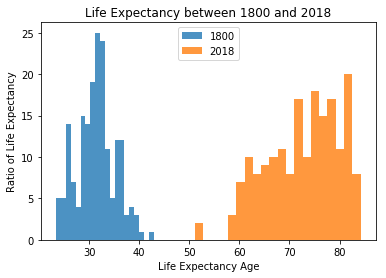

In [70]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
plt.hist(trend_df_1800["Life_Expectancy"], bins=20, alpha=0.8, label='1800')
plt.hist(trend_df_2018["Life_Expectancy"], bins=20, alpha=0.8, label='2018')
plt.title("Life Expectancy between 1800 and 2018")
plt.xlabel("Life Expectancy Age")
plt.ylabel('Ratio of Life Expectancy')
plt.legend(loc='upper center')
plt.show()

In [ ]:
plt.hist(trend_df_1800["Life_Expectancy"], bins=20, alpha=0.8, label='1800')
plt.hist(trend_df_2018["Life_Expectancy"], bins=20, alpha=0.8, label='2018')
plt.title("Life Expectancy between 1800 and 2018")
plt.xlabel("Life Expectancy Age")
plt.ylabel('Ratio of Life Expectancy')
plt.legend(loc='upper center')
plt.show()

### Research Question 2  (How has GDP per individual been changed over 200 years?)

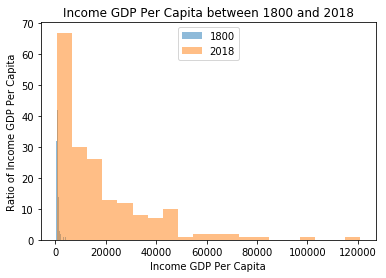

In [89]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
plt.hist(trend_df_1800["Income_GDP_Per_Capita"], bins=20, alpha=0.5, label='1800')
plt.hist(trend_df_2018["Income_GDP_Per_Capita"], bins=20, alpha=0.5, label='2018')
plt.title("Income GDP Per Capita between 1800 and 2018")
plt.xlabel("Income GDP Per Capita")
plt.ylabel('Ratio of Income GDP Per Capita')
plt.legend(loc='upper center')
plt.show()

### Research Question 3  (How has total fertility been changed over 200 years?)

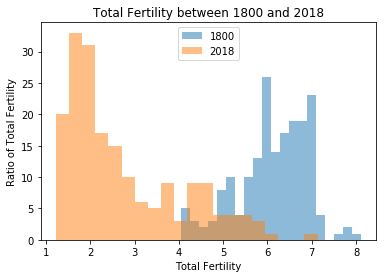

In [88]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
plt.hist(trend_df_1800["Total_Fertility"], bins=20, alpha=0.5, label='1800')
plt.hist(trend_df_2018["Total_Fertility"], bins=20, alpha=0.5, label='2018')
plt.title("Total Fertility between 1800 and 2018")
plt.xlabel("Total Fertility")
plt.ylabel('Ratio of Total Fertility')
plt.legend(loc='upper center')
plt.show()

### Research Question 3  (How has population been changed over 200 years?)

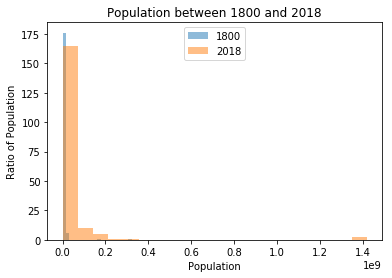

In [87]:

# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
plt.hist(trend_df_1800["Population"], bins=20, alpha=0.5, label='1800')
plt.hist(trend_df_2018["Population"], bins=20, alpha=0.5, label='2018')
plt.title("Population between 1800 and 2018")
plt.xlabel("Population")
plt.ylabel('Ratio of Population')
plt.legend(loc='upper center')
plt.show()

### Research Question 4  (How was the comparison of low GDP and high GDP  in 1800?)

In [99]:
trend_df_1800_Income_GDP_Per_Capita_median = trend_df_1800['Income_GDP_Per_Capita'].median()
trend_df_1800_Income_GDP_Per_Capita_median

848.5

In [110]:
low_GDP_1800 = trend_df_1800.query('Income_GDP_Per_Capita <@trend_df_1800_Income_GDP_Per_Capita_median')

In [111]:
high_GDP_1800 = trend_df_1800.query('Income_GDP_Per_Capita >@trend_df_1800_Income_GDP_Per_Capita_median')

In [112]:
low_GDP_1800.mean()

Total_Fertility          6.330978e+00
Income_GDP_Per_Capita    6.162391e+02
Life_Expectancy          3.051739e+01
Population               1.241543e+06
dtype: float64

In [117]:
high_GDP_1800.mean()

Total_Fertility          5.890435e+00
Income_GDP_Per_Capita    1.273957e+03
Life_Expectancy          3.248804e+01
Population               9.055432e+06
dtype: float64

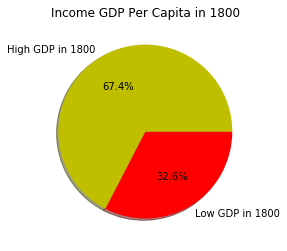

In [127]:
values = [low_GDP_1800['Income_GDP_Per_Capita'].mean(),high_GDP_1800['Income_GDP_Per_Capita'].mean()]
colors = ['r', 'y']
labels = ['Low GDP in 1800', 'High GDP in 1800']
explode = (0, 0)
plt.pie(values, colors=colors, labels=labels,
explode=explode, autopct='%1.1f%%',
counterclock=False, shadow=True)
plt.title('Income GDP Per Capita in 1800')
plt.show()

### Research Question 5  (How was the comparison of low GDP and high GDP  in 2018?)

In [109]:
trend_df_2018_Income_GDP_Per_Capita_median = trend_df_2018['Income_GDP_Per_Capita'].median()
trend_df_2018_Income_GDP_Per_Capita_median

11900.0

In [114]:
low_GDP_2018 = trend_df_2018.query('Income_GDP_Per_Capita <@trend_df_2018_Income_GDP_Per_Capita_median')
high_GDP_2018 = trend_df_2018.query('Income_GDP_Per_Capita >@trend_df_2018_Income_GDP_Per_Capita_median')

In [115]:
low_GDP_2018.mean()

Total_Fertility          3.556304e+00
Income_GDP_Per_Capita    4.567826e+03
Life_Expectancy          6.759783e+01
Population               4.127939e+07
dtype: float64

In [116]:
high_GDP_2018.mean()

Total_Fertility          1.918913e+00
Income_GDP_Per_Capita    3.127065e+04
Life_Expectancy          7.771848e+01
Population               4.127713e+07
dtype: float64

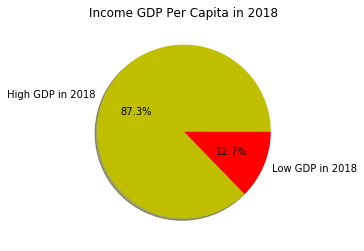

In [129]:
values = [low_GDP_2018['Income_GDP_Per_Capita'].mean(),high_GDP_2018['Income_GDP_Per_Capita'].mean()]
colors = ['r', 'y']
labels = ['Low GDP in 2018', 'High GDP in 2018']
explode = (0, 0)
plt.pie(values, colors=colors, labels=labels,
explode=explode, autopct='%1.1f%%',
counterclock=False, shadow=True)
plt.title('Income GDP Per Capita in 2018')
plt.show()

### Research Question 6  (How was the comparison of low fertility and high fertility  in 1800?)

In [130]:
trend_df_1800_Total_Fertility_median = trend_df_1800['Total_Fertility'].median()
trend_df_1800_Total_Fertility_median

6.19

In [131]:
low_total_Fertility_1800 = trend_df_1800.query('Total_Fertility <@trend_df_1800_Total_Fertility_median')
high_total_Fertility_1800 = trend_df_1800.query('Total_Fertility >@trend_df_1800_Total_Fertility_median')

In [132]:
low_total_Fertility_1800.mean()

Total_Fertility          5.472857e+00
Income_GDP_Per_Capita    1.075901e+03
Life_Expectancy          3.271099e+01
Population               8.132181e+06
dtype: float64

In [133]:
high_total_Fertility_1800.mean()

Total_Fertility          6.746813e+00
Income_GDP_Per_Capita    8.157363e+02
Life_Expectancy          3.029341e+01
Population               2.261200e+06
dtype: float64

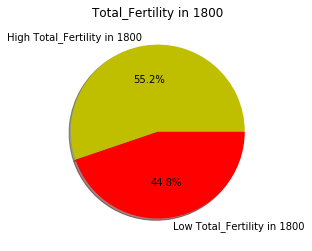

In [135]:
values = [low_total_Fertility_1800['Total_Fertility'].mean(),high_total_Fertility_1800['Total_Fertility'].mean()]
colors = ['r', 'y']
labels = ['Low Total_Fertility in 1800', 'High Total_Fertility in 1800']
explode = (0, 0)
plt.pie(values, colors=colors, labels=labels,
explode=explode, autopct='%1.1f%%',
counterclock=False, shadow=True)
plt.title('Total_Fertility in 1800')
plt.show()

### Research Question 6  (How was the comparison of low fertility and high fertility  in 2018?)

In [138]:
trend_df_2018_Total_Fertility_median = trend_df_2018['Total_Fertility'].median()
trend_df_2018_Total_Fertility_median

2.2649999999999997

In [139]:
low_total_Fertility_2018 = trend_df_2018.query('Total_Fertility <@trend_df_2018_Total_Fertility_median')
high_total_Fertility_2018 = trend_df_2018.query('Total_Fertility >@trend_df_2018_Total_Fertility_median')

In [140]:
low_total_Fertility_2018.mean()

Total_Fertility          1.751196e+00
Income_GDP_Per_Capita    2.881087e+04
Life_Expectancy          7.788804e+01
Population               4.332049e+07
dtype: float64

In [141]:
high_total_Fertility_2018.mean()

Total_Fertility          3.724022e+00
Income_GDP_Per_Capita    7.027609e+03
Life_Expectancy          6.742826e+01
Population               3.923603e+07
dtype: float64

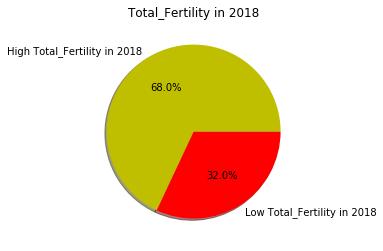

In [142]:
values = [low_total_Fertility_2018['Total_Fertility'].mean(),high_total_Fertility_2018['Total_Fertility'].mean()]
colors = ['r', 'y']
labels = ['Low Total_Fertility in 2018', 'High Total_Fertility in 2018']
explode = (0, 0)
plt.pie(values, colors=colors, labels=labels,
explode=explode, autopct='%1.1f%%',
counterclock=False, shadow=True)
plt.title('Total_Fertility in 2018')
plt.show()

### Research Question 7  (How was the comparison of low life expectancy and high life expectancy  in 1800?)

In [144]:
trend_df_1800_Life_Expectancy_median = trend_df_1800['Life_Expectancy'].median()
trend_df_1800_Life_Expectancy_median

31.75

In [146]:
low_life_expectancy_1800 = trend_df_1800.query('Life_Expectancy <@trend_df_1800_Life_Expectancy_median')
high_life_expectancy_1800 = trend_df_1800.query('Life_Expectancy >@trend_df_1800_Life_Expectancy_median')

In [147]:
low_total_Fertility_1800.mean()

Total_Fertility          5.472857e+00
Income_GDP_Per_Capita    1.075901e+03
Life_Expectancy          3.271099e+01
Population               8.132181e+06
dtype: float64

In [148]:
high_life_expectancy_1800.mean()

Total_Fertility          5.852283e+00
Income_GDP_Per_Capita    1.098380e+03
Life_Expectancy          3.450000e+01
Population               6.037064e+06
dtype: float64

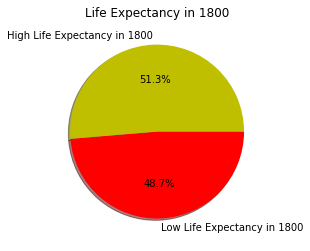

In [154]:
values = [low_total_Fertility_1800['Life_Expectancy'].mean(),high_life_expectancy_1800['Life_Expectancy'].mean()]
colors = ['r', 'y']
labels = ['Low Life Expectancy in 1800', 'High Life Expectancy in 1800']
explode = (0, 0)
plt.pie(values, colors=colors, labels=labels,
explode=explode, autopct='%1.1f%%',
counterclock=False, shadow=True)
plt.title('Life Expectancy in 1800')
plt.show()

### Research Question 8  (How was the comparison of low life expectancy and high life expectancy  in 2018?)

In [150]:
trend_df_2018_Life_Expectancy_median = trend_df_2018['Life_Expectancy'].median()
trend_df_2018_Life_Expectancy_median

74.05

In [151]:
low_life_expectancy_2018 = trend_df_2018.query('Life_Expectancy <@trend_df_2018_Life_Expectancy_median')
high_life_expectancy_2018 = trend_df_2018.query('Life_Expectancy >@trend_df_2018_Life_Expectancy_median')

In [152]:
low_life_expectancy_2018.mean()

Total_Fertility          3.633043e+00
Income_GDP_Per_Capita    5.985326e+03
Life_Expectancy          6.665652e+01
Population               4.229152e+07
dtype: float64

In [156]:
high_life_expectancy_2018.mean()

Total_Fertility          1.842174e+00
Income_GDP_Per_Capita    2.985315e+04
Life_Expectancy          7.865978e+01
Population               4.026500e+07
dtype: float64

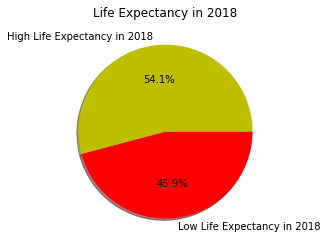

In [157]:
values = [low_life_expectancy_2018['Life_Expectancy'].mean(),high_life_expectancy_2018['Life_Expectancy'].mean()]
colors = ['r', 'y']
labels = ['Low Life Expectancy in 2018', 'High Life Expectancy in 2018']
explode = (0, 0)
plt.pie(values, colors=colors, labels=labels,
explode=explode, autopct='%1.1f%%',
counterclock=False, shadow=True)
plt.title('Life Expectancy in 2018')
plt.show()

### Research Question 9  (How was the comparison of low population and high population  in 1800?)

In [158]:
trend_df_1800_Population_median = trend_df_1800['Population'].median()
trend_df_1800_Population_median

763000.0

In [160]:
low_Population_1800 = trend_df_1800.query('Population <@trend_df_1800_Population_median')
high_Population_1800 = trend_df_1800.query('Population >@trend_df_1800_Population_median')

In [162]:
low_Population_1800.mean()

Total_Fertility               6.117609
Income_GDP_Per_Capita       831.054348
Life_Expectancy              31.240217
Population               240812.282609
dtype: float64

In [161]:
high_Population_1800.mean()

Total_Fertility          6.103804e+00
Income_GDP_Per_Capita    1.059141e+03
Life_Expectancy          3.176522e+01
Population               1.005616e+07
dtype: float64

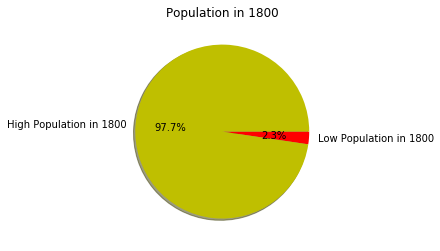

In [163]:
values = [low_Population_1800['Population'].mean(),high_Population_1800['Population'].mean()]
colors = ['r', 'y']
labels = ['Low Population in 1800', 'High Population in 1800']
explode = (0, 0)
plt.pie(values, colors=colors, labels=labels,
explode=explode, autopct='%1.1f%%',
counterclock=False, shadow=True)
plt.title('Population in 1800')
plt.show()

### Research Question 10  (How was the comparison of low population and high population  in 2018?)

In [164]:
trend_df_2018_Population_median = trend_df_2018['Population'].median()
trend_df_2018_Population_median

9495000.0

In [165]:
low_Population_2018 = trend_df_1800.query('Population <@trend_df_2018_Population_median')
high_Population_2018 = trend_df_1800.query('Population >@trend_df_2018_Population_median')

In [166]:
low_Population_2018.mean()

Total_Fertility          6.130060e+00
Income_GDP_Per_Capita    9.038095e+02
Life_Expectancy          3.145060e+01
Population               1.244296e+06
dtype: float64

In [167]:
high_Population_2018.mean()

Total_Fertility          5.907500e+00
Income_GDP_Per_Capita    1.378625e+03
Life_Expectancy          3.205000e+01
Population               4.614250e+07
dtype: float64

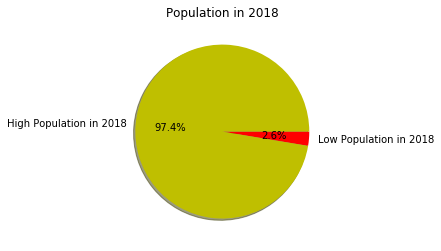

In [169]:
values = [low_Population_2018['Population'].mean(),high_Population_2018['Population'].mean()]
colors = ['r', 'y']
labels = ['Low Population in 2018', 'High Population in 2018']
explode = (0, 0)
plt.pie(values, colors=colors, labels=labels,
explode=explode, autopct='%1.1f%%',
counterclock=False, shadow=True)
plt.title('Population in 2018')
plt.show()

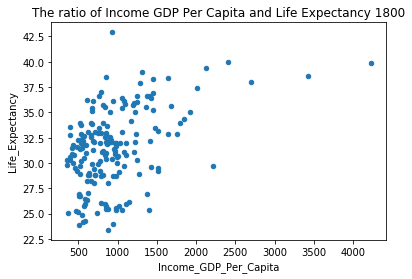

In [173]:
trend_df_1800.plot(x='Income_GDP_Per_Capita', y='Life_Expectancy', kind='scatter'
                   ,title="The ratio of Income GDP Per Capita and Life Expectancy 1800");

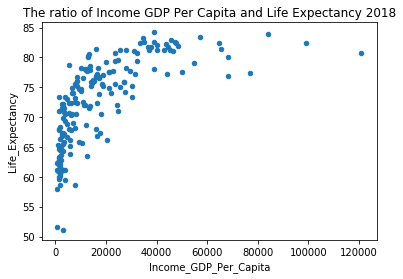

In [174]:
trend_df_2018.plot(x='Income_GDP_Per_Capita', y='Life_Expectancy', kind='scatter'
                   ,title="The ratio of Income GDP Per Capita and Life Expectancy 2018");

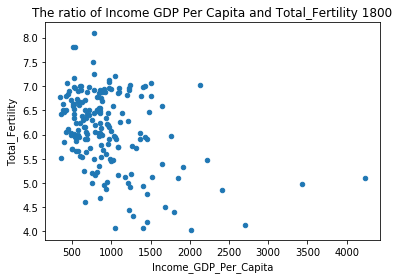

In [175]:
trend_df_1800.plot(x='Income_GDP_Per_Capita', y='Total_Fertility', kind='scatter'
                   ,title="The ratio of Income GDP Per Capita and Total_Fertility 1800");

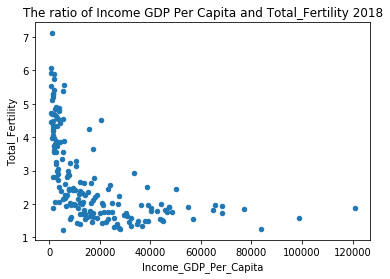

In [176]:
trend_df_2018.plot(x='Income_GDP_Per_Capita', y='Total_Fertility', kind='scatter'
                   ,title="The ratio of Income GDP Per Capita and Total_Fertility 2018");

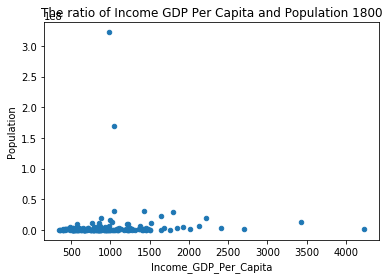

In [177]:
trend_df_1800.plot(x='Income_GDP_Per_Capita', y='Population', kind='scatter'
                   ,title="The ratio of Income GDP Per Capita and Population 1800");

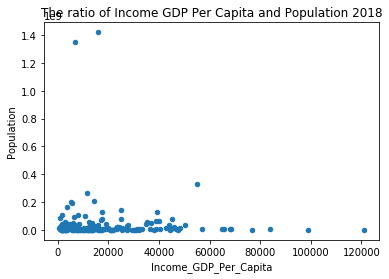

In [178]:
trend_df_2018.plot(x='Income_GDP_Per_Capita', y='Population', kind='scatter'
                   ,title="The ratio of Income GDP Per Capita and Population 2018");

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!